<h1>Импорт библиотек

In [90]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [91]:
def sum_matrix_vector_products(matrices, vectors):
    if matrices.shape[0] != vectors.shape[0]:
        raise ValueError("The number of matrices and vectors must be the same.")
    if matrices.shape[1] != matrices.shape[2] or matrices.shape[1] != vectors.shape[1]:
        raise ValueError("Matrices must be square and compatible with vector dimensions.")
    
    products = np.matmul(matrices, vectors)
    sum_products = np.sum(products, axis=0)
    return sum_products

def test_sum_matrix_vector_products():
    # Test case 1
    p = 2
    n = 3
    matrices = np.array([
        [[1, 2, 3],
         [0, 1, 4],
         [5, 6, 0]],
        [[7, 8, 9],
         [2, 3, 4],
         [1, 0, 2]]
    ])
    vectors = np.array([
        [[1],
         [0],
         [1]],
        [[2],
         [1],
         [0]]
    ])
    result = sum_matrix_vector_products(matrices, vectors)

    product1 = np.matmul(matrices[0], vectors[0])
    product2 = np.matmul(matrices[1], vectors[1])

    expected = product1 + product2
    
    assert np.array_equal(result, expected), f"Expected {expected}, got {result}"

    try:
        matrices = np.zeros((2, n, n))
        vectors = np.zeros((3, n, 1))
        sum_matrix_vector_products(matrices, vectors)
    except ValueError as e:
        assert str(e) == "The number of matrices and vectors must be the same."

    try:
        matrices = np.zeros((p, n, n))
        vectors = np.zeros((p, n+1, 1))
        sum_matrix_vector_products(matrices, vectors)
    except ValueError as e:
        assert str(e) == "Matrices must be square and compatible with vector dimensions."

    print("All tests passed.")

# Run tests
test_sum_matrix_vector_products()


All tests passed.


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [92]:
def binarize_matrix(M, threshold):
    binarized = np.where(M > threshold, 1, 0)
    return binarized

def test_binarize_matrix():
    M = np.array([
        [0.2, 0.5, 0.7],
        [0.1, 0.8, 0.4],
        [0.6, 0.3, 0.9]
    ])
    threshold = 0.5
    result = binarize_matrix(M, threshold)
    expected = np.array([
        [0, 0, 1],
        [0, 1, 0],
        [1, 0, 1]
    ])
    assert np.array_equal(result, expected), f"Expected {expected}, got {result}"

    result = binarize_matrix(M, 1.0)
    expected = np.zeros_like(M)
    assert np.array_equal(result, expected), f"Expected {expected}, got {result}"

    M_neg = np.array([
        [-1, 0, 1],
        [-0.5, 0.5, -0.2]
    ])
    threshold = 0
    result = binarize_matrix(M_neg, threshold)
    expected = np.array([
        [0, 0, 1],
        [0, 1, 0]
    ])
    assert np.array_equal(result, expected), f"Expected {expected}, got {result}"

    print("All tests passed.")

test_binarize_matrix()

All tests passed.


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [93]:
def unique_elements_per_row(matrix):
    return [np.unique(row) for row in matrix]

def unique_elements_per_column(matrix):
    return [np.unique(col) for col in matrix.T]

# Tests
def test_unique_elements():
    matrix = np.array([
        [1, 2, 2, 3],
        [4, 4, 5, 5],
        [6, 7, 6, 7]
    ])
    row_uniques = unique_elements_per_row(matrix)
    expected_row_uniques = [np.array([1,2,3]), np.array([4,5]), np.array([6,7])]
    for result, expected in zip(row_uniques, expected_row_uniques):
        assert np.array_equal(result, expected), f"Expected {expected}, got {result}"

    column_uniques = unique_elements_per_column(matrix)
    expected_column_uniques = [
        np.array([1,4,6]),
        np.array([2,4,7]),
        np.array([2,5,6]),
        np.array([3,5,7])
    ]
    for result, expected in zip(column_uniques, expected_column_uniques):
        assert np.array_equal(result, expected), f"Expected {expected}, got {result}"

    print("All tests passed.")

test_unique_elements()

All tests passed.


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

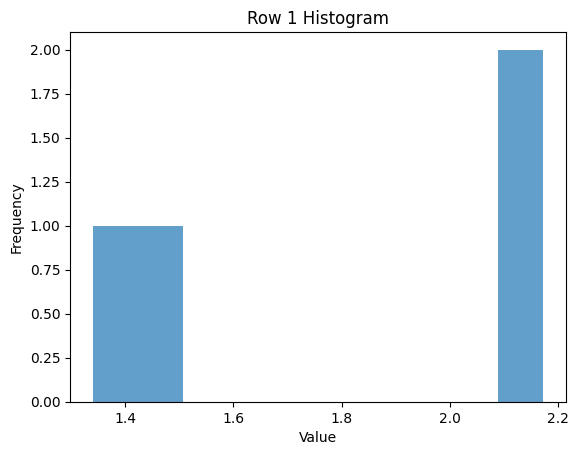

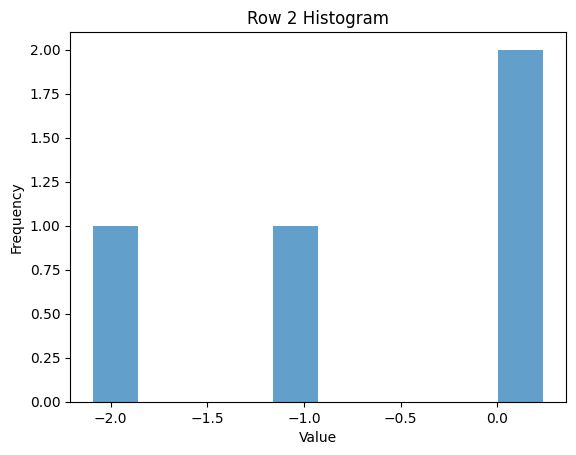

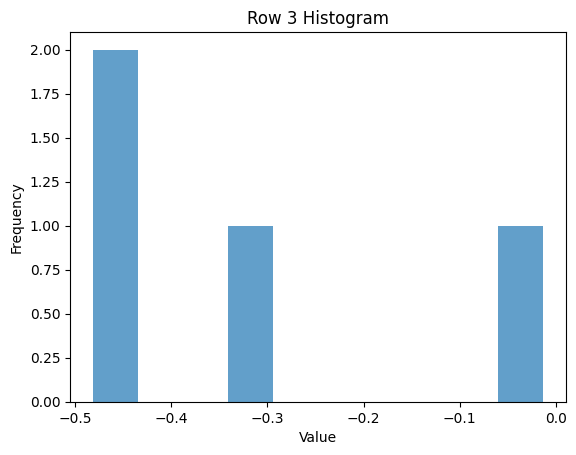

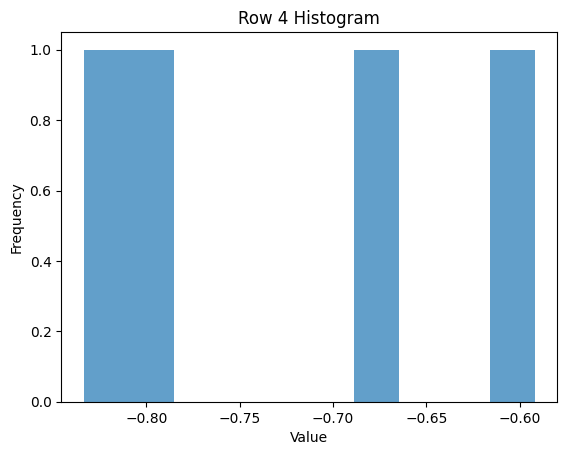

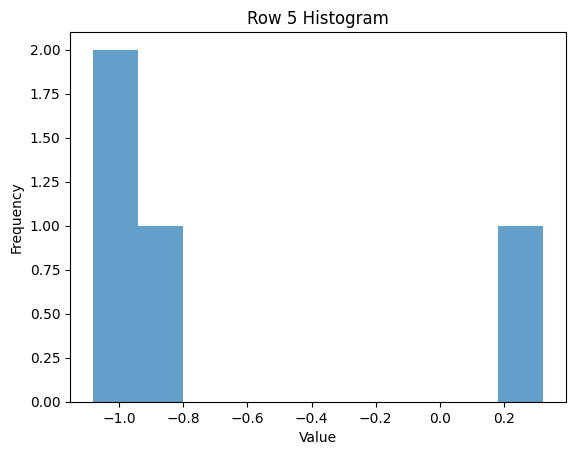

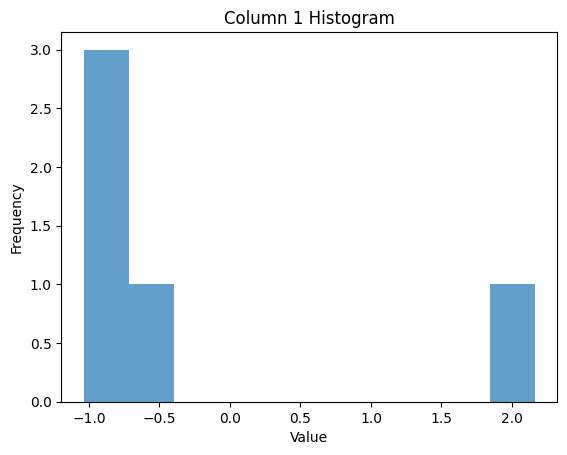

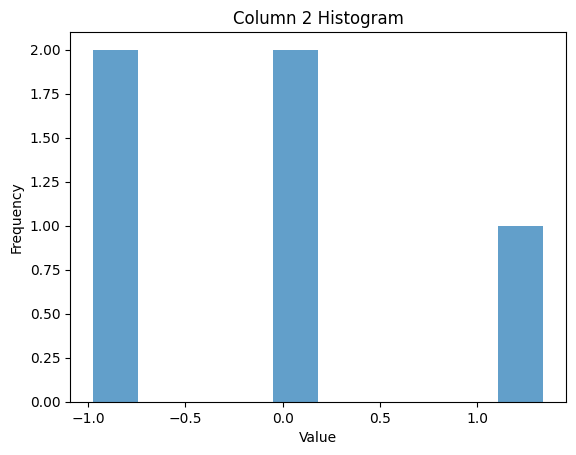

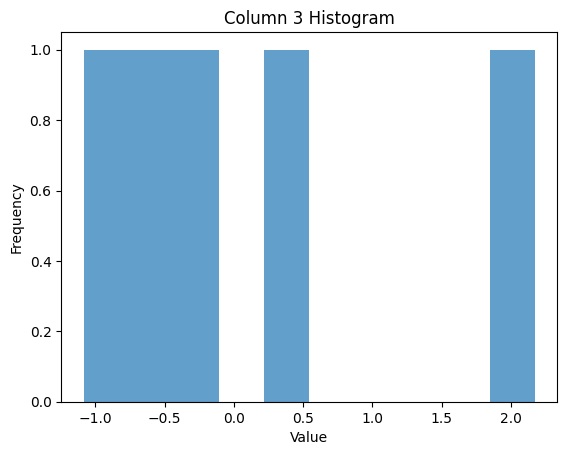

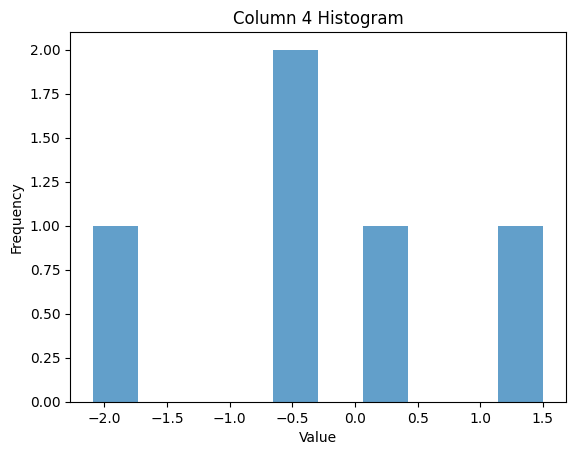

Test passed.


In [94]:
def random_matrix_stats(m, n, mean=0, std=1):
    matrix = np.random.normal(loc=mean, scale=std, size=(m, n))

    row_means = np.mean(matrix, axis=1)
    row_vars = np.var(matrix, axis=1)
    col_means = np.mean(matrix, axis=0)
    col_vars = np.var(matrix, axis=0)

    stats = {
        'matrix': matrix,
        'row_means': row_means,
        'row_vars': row_vars,
        'col_means': col_means,
        'col_vars': col_vars
    }

    # Plot histograms for rows
    for i in range(m):
        plt.figure()
        plt.hist(matrix[i, :], bins=10, alpha=0.7)
        plt.title(f'Row {i+1} Histogram')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.show()

    for j in range(n):
        plt.figure()
        plt.hist(matrix[:, j], bins=10, alpha=0.7)
        plt.title(f'Column {j+1} Histogram')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.show()

    return stats

def test_random_matrix_stats():
    m, n = 5, 4
    stats = random_matrix_stats(m, n)
    matrix = stats['matrix']
    assert matrix.shape == (m, n), f"Expected matrix shape {(m, n)}, got {matrix.shape}"
    # Check means and variances
    row_means = np.mean(matrix, axis=1)
    assert np.allclose(stats['row_means'], row_means), "Row means do not match."
    row_vars = np.var(matrix, axis=1)
    assert np.allclose(stats['row_vars'], row_vars), "Row variances do not match."
    col_means = np.mean(matrix, axis=0)
    assert np.allclose(stats['col_means'], col_means), "Column means do not match."
    col_vars = np.var(matrix, axis=0)
    assert np.allclose(stats['col_vars'], col_vars), "Column variances do not match."

    print("Test passed.")

test_random_matrix_stats()

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [95]:
def chessboard_matrix(m, n, a, b):
    matrix = np.zeros((m, n), dtype=type(a))
    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                matrix[i, j] = a
            else:
                matrix[i, j] = b
    return matrix

def test_chessboard_matrix():
    m, n = 4, 5
    a, b = 1, 0
    result = chessboard_matrix(m, n, a, b)
    expected = np.array([
        [1, 0, 1, 0, 1],
        [0, 1, 0, 1, 0],
        [1, 0, 1, 0, 1],
        [0, 1, 0, 1, 0]
    ])
    assert np.array_equal(result, expected), f"Expected {expected}, got {result}"

    a, b = 'A', 'B'
    result = chessboard_matrix(2, 2, a, b)
    expected = np.array([
        ['A', 'B'],
        ['B', 'A']
    ])
    assert np.array_equal(result, expected), f"Expected {expected}, got {result}"

    print("All tests passed.")

test_chessboard_matrix()

All tests passed.


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

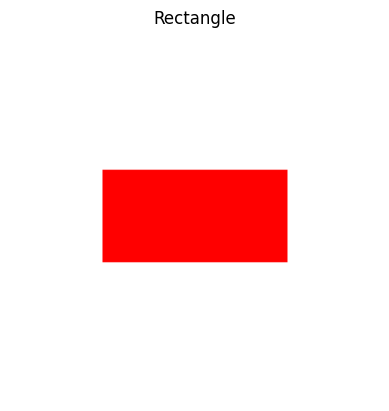

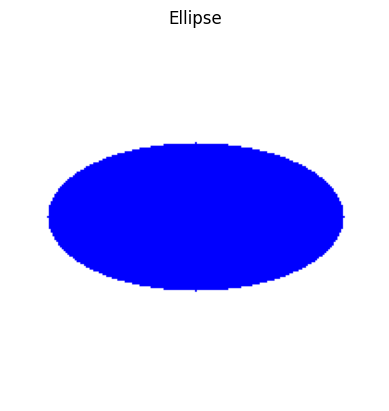

Tests completed.


In [96]:
def draw_rectangle(m, n, a, b, bg_color, rect_color):
    image = np.full((m, n, 3), bg_color, dtype=np.uint8)
    start_x = (n - a) // 2
    start_y = (m - b) // 2
    image[start_y:start_y + b, start_x:start_x + a] = rect_color
    return image

def draw_ellipse(m, n, a, b, bg_color, ellipse_color):
    image = np.full((m, n, 3), bg_color, dtype=np.uint8)
    y, x = np.ogrid[:m, :n]
    y0, x0 = m // 2, n // 2
    ellipse = ((x - x0) ** 2) / a ** 2 + ((y - y0) ** 2) / b ** 2 <= 1
    image[ellipse] = ellipse_color
    return image

def test_draw_shapes():
    m, n = 200, 200
    a_rect, b_rect = 100, 50
    bg_color = (255, 255, 255)
    rect_color = (255, 0, 0)

    rect_image = draw_rectangle(m, n, a_rect, b_rect, bg_color, rect_color)
    assert rect_image.shape == (m, n, 3), f"Image shape incorrect, got {rect_image.shape}"

    plt.imshow(rect_image)
    plt.title("Rectangle")
    plt.axis('off')
    plt.show()

    a_ellipse, b_ellipse = 80, 40
    ellipse_color = (0, 0, 255)

    ellipse_image = draw_ellipse(m, n, a_ellipse, b_ellipse, bg_color, ellipse_color)
    assert ellipse_image.shape == (m, n, 3), f"Image shape incorrect, got {ellipse_image.shape}"

    plt.imshow(ellipse_image)
    plt.title("Ellipse")
    plt.axis('off')
    plt.show()

    print("Tests completed.")

test_draw_shapes()

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [97]:
def analyze_time_series(series, p):
    mean = np.mean(series)
    variance = np.var(series)
    std_dev = np.std(series)

    maxima = []
    minima = []
    n = len(series)
    for i in range(n):
        if i == 0:
            if series[i] > series[i + 1]:
                maxima.append((i, int(series[i])))
            elif series[i] < series[i + 1]:
                minima.append((i, int(series[i])))
        elif i == n - 1:
            if series[i] > series[i - 1]:
                maxima.append((i, int(series[i])))
            elif series[i] < series[i - 1]:
                minima.append((i, int(series[i])))
        else:
            if series[i] > series[i - 1] and series[i] > series[i + 1]:
                maxima.append((i, int(series[i])))
            elif series[i] < series[i - 1] and series[i] < series[i + 1]:
                minima.append((i, int(series[i])))

    moving_avg = np.convolve(series, np.ones(p)/p, mode='valid')

    results = {
        'mean': mean,
        'variance': variance,
        'std_dev': std_dev,
        'local_maxima': maxima,
        'local_minima': minima,
        'moving_average': moving_avg
    }
    return results

def test_analyze_time_series():
    series = np.array([1, 3, 2, 5, 4, 6, 5, 7, 6, 8])
    p = 3
    results = analyze_time_series(series, p)
    expected_mean = np.mean(series)
    assert results['mean'] == expected_mean, f"Expected mean {expected_mean}, got {results['mean']}"

    expected_variance = np.var(series)
    assert results['variance'] == expected_variance, f"Expected variance {expected_variance}, got {results['variance']}"

    expected_std_dev = np.std(series)
    assert results['std_dev'] == expected_std_dev, f"Expected std_dev {expected_std_dev}, got {results['std_dev']}"

    expected_maxima = [(1, 3), (3, 5), (5, 6), (7, 7), (9, 8)]
    expected_minima = [(0, 1), (2, 2), (4, 4), (6, 5), (8, 6)]
    assert results['local_maxima'] == expected_maxima, f"Expected maxima {expected_maxima}, got {results['local_maxima']}"
    assert results['local_minima'] == expected_minima, f"Expected minima {expected_minima}, got {results['local_minima']}"

    expected_moving_avg = np.convolve(series, np.ones(p)/p, mode='valid')
    assert np.allclose(results['moving_average'], expected_moving_avg), "Moving average does not match."

    print("All tests passed.")

test_analyze_time_series()

All tests passed.


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [98]:
def one_hot_encode(labels):
    labels = np.array(labels)
    num_classes = np.max(labels) + 1
    one_hot = np.zeros((len(labels), num_classes), dtype=int)
    one_hot[np.arange(len(labels)), labels] = 1
    return one_hot

def test_one_hot_encode():
    labels = [0, 2, 3, 0]
    result = one_hot_encode(labels)
    expected = np.array([
        [1, 0, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1],
        [1, 0, 0, 0]
    ])
    assert np.array_equal(result, expected), f"Expected {expected}, got {result}"

    labels = [1, 2, 1, 0]
    result = one_hot_encode(labels)
    expected = np.array([
        [0, 1, 0],
        [0, 0, 1],
        [0, 1, 0],
        [1, 0, 0]
    ])
    assert np.array_equal(result, expected), f"Expected {expected}, got {result}"

    labels = [3, 5, 4, 3]
    result = one_hot_encode(labels)
    expected = np.array([
        [0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 0]
    ])
    assert np.array_equal(result, expected), f"Expected {expected}, got {result}"

    print("All tests passed.")

test_one_hot_encode()

All tests passed.
